In [27]:
import andes
import os
import matplotlib.pyplot as plt
# import matplotlib 
%matplotlib inline


# Load case

In [28]:
andes.config_logger(stream_level=20)

# case path
dir_path = os.path.abspath('..')
loc_path_case1 = '/Case_123bus/case123_REGCV1.xlsx'
loc_path_case2 = '/Case_123bus/case123_REGCV1_v2.xlsx'
loc_path_case3 = '/Case_123bus/case123_REGCV1_v3.xlsx'
loc_path_case4 = '/Case_123bus/case123_REGCV1_v4.xlsx'

case = dir_path + loc_path_case4

# load a case
ssa = andes.load(case,
                 setup=True,
                 no_output=True)

Working directory: "/home/buxin/andes/bshe/Case_123bus"
> Loaded config from file "/home/buxin/.andes/andes.rc"
> Reloaded generated Python code of module "pycode".
Parsing input file "/home/buxin/andes/bshe/Case_123bus/case123_REGCV1_v4.xlsx"...
Input file parsed in 0.0719 seconds.
System internal structure set up in 0.0219 seconds.


In [29]:
ssa.PFlow.run()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0026 seconds.
0: |F(x)| = 0.8
1: |F(x)| = 0.0005057156877
2: |F(x)| = 2.592582604e-07
Converged in 3 iterations in 0.0038 seconds.


True

In [30]:
ssa.TDS.init()

Initialization for dynamics completed in 0.0321 seconds.
Initialization was successful.


array([ 1.79511074e-01,  1.75580089e-01,  1.90851166e-01,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.01827276e+00,  1.00552287e+00,
        9.92731361e-01,  1.30081617e-01,  1.56726598e-01,  1.57950697e-01,
        9.88395417e-01,  9.83858405e-01,  9.83391868e-01,  1.66580863e-01,
        1.88305838e-01,  1.89776583e-01,  8.01759668e-02,  8.01450284e-02,
        7.60209171e-02,  8.01759668e-02,  8.01450284e-02,  7.60209171e-02,
        1.14117029e+00,  1.09812097e+00,  1.03265016e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  2.27169114e-02, -4.61834263e-03,
       -2.04485180e-03,  2.29440805e-01, -4.66452606e-02, -2.06530032e-02,
        1.14117029e+00,  1.09812097e+00,  1.03265016e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  8.01759668e-02,  8.01450284e-02,
        7.60209171e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        8.01759668e-02,  8.01450284e-02,  7.60209171e-02,  8.01759668e-02,
        8.01450284e-02,  

In [31]:
# Turn off stability check in TDS
ssa.TDS.config.criteria = 0

# Turn off simulation progress bar
ssa.TDS.config.no_tqdm = 1

ssa.TDS.config.tf = 15

ssa.TDS.run()


-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-15 s.
Fixed step size: h=33.33 ms. Shrink if not converged.


<Toggle Toggler_1>: GENROU.GENROU_2 status changed to 0 at t=5.0 sec.


Simulation to t=15.00 sec completed in 0.9283 seconds.


True

# Plot

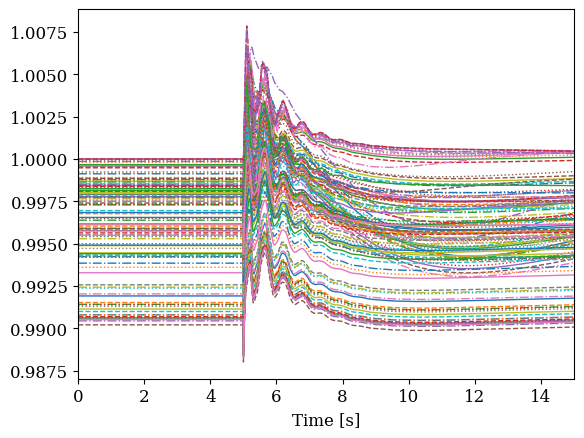

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [32]:
ssa.TDS.plt.plot(
                ssa.Bus.v
                )

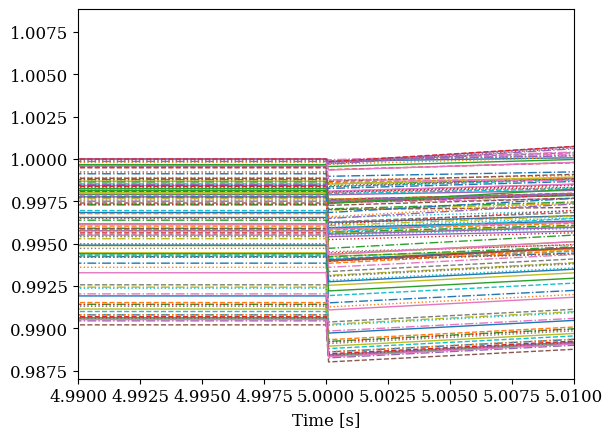

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [33]:
ssa.TDS.plt.plot(
                ssa.Bus.v,
                # ymin = ...,
                # ymax = ...,
                left = 4.99,
                right = 5.01,
                )

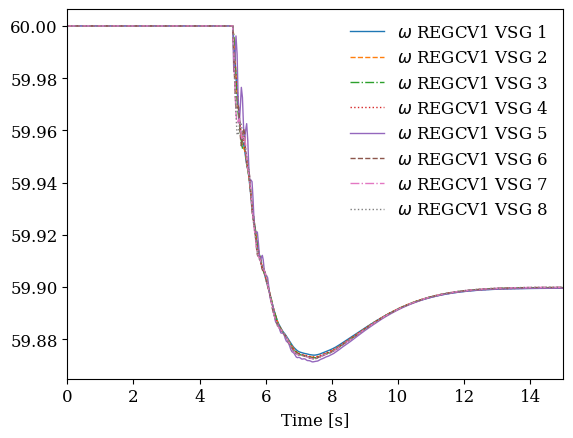

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [34]:
ssa.TDS.plt.plot(
                ssa.REGCV1.omega,
                ytimes = 60
                )

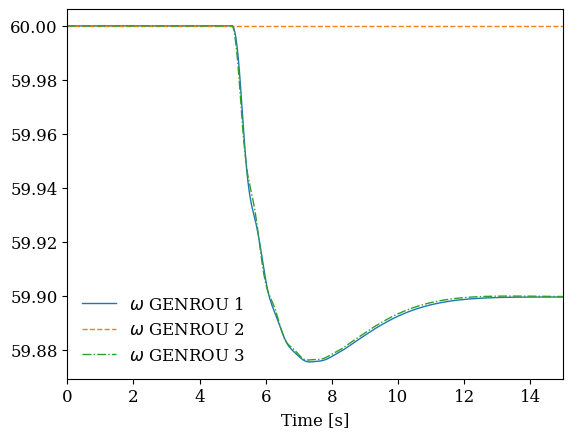

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [35]:
ssa.TDS.plt.plot(
                ssa.GENROU.omega,
                ytimes = 60
                )

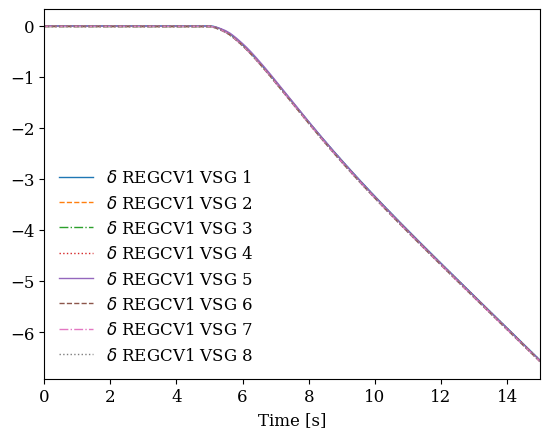

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [36]:
# connected bus angle
# ssa.TDS.plt.plot(
#                 ssa.GENROW.a,
#                 )

# IBR voltage
ssa.TDS.plt.plot(
                ssa.REGCV1.delta,
                )

In [37]:
# ssa.TDS.plt.plot(
#                 ssa.BusROCOF.Wf_y,
#                 ytimes = 60
#                 )
                

## Plot RoCoF

In [38]:
t = ssa.dae.ts.t

rocof = ssa.dae.ts.y[:,  ssa.BusROCOF.Wf_y.a]
rocof_sg = rocof[:,[0,1,2]]
rocof_ibr = rocof[:, [3,4,5,6,7,8,9,10]]


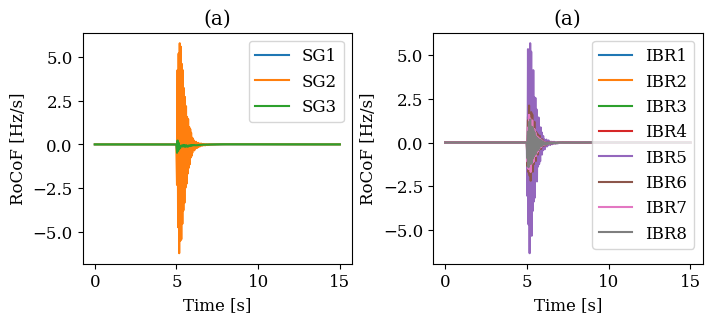

In [39]:
fig = plt.figure(figsize=(8, 3))
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.3, hspace=0.3)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ibr_legend = ['IBR1','IBR2','IBR3','IBR4','IBR5','IBR6','IBR7','IBR8']
sg_legend = ['SG1', 'SG2', 'SG3']

ax1.plot(
            t,
            rocof_sg * 60,
        )
ax1.set_title('(a)')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('RoCoF [Hz/s]')
ax1.legend(sg_legend)
# ax1.set_ylim([0.95, 1.12])
# ax1.set_xlim([0, 3600])

ax2.plot(
            t,
            rocof_ibr * 60,
        )
ax2.set_title('(a)')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('RoCoF [Hz/s]')
ax2.legend(ibr_legend)